# Mean orientation per grain
In this notebook, we wiil see how to performed average orientation per grain.

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu
import xarrayuvecs.lut2d as lut2d

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [4]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## Filter the data

In [5]:
data.aita.filter(75)

## The average orientation
The definition of the grain is base on the value present in `grainId` variable. Therefore one grain corresponds to all the pixel with the same label.

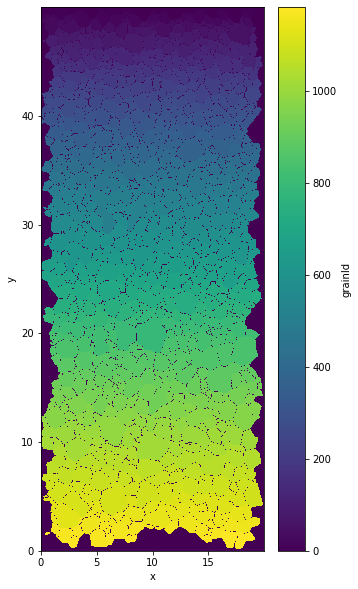

In [6]:
plt.figure(figsize=(5,10))
data.grainId.plot()

The "average" orientation is defined as the main eigen vectoc of the seconde order orientation tensor (see `uvecs.OT2nd`). And can be compute with `aita.mean_grain`.

In [7]:
help(xa.aita.mean_grain)

Help on function mean_grain in module xarrayaita.aita:

mean_grain(self, dilate=True)
    Compute the mean orientation inside the grain
    :param dilate: remove grain boundaries by dilatation (default True)
    :type dilate: bool



In [10]:
data['orientation_mg']=data.aita.mean_grain()

  0%|          | 0/1182 [00:00<?, ?it/s]

## The output

In [11]:
data

<xarray.Dataset>
Dimensions:         (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x               (x) float64 0.0 0.02 0.04 0.06 ... 19.92 19.94 19.96 19.98
  * y               (y) float64 49.98 49.96 49.94 49.92 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation     (y, x, uvecs) float64 nan nan 5.377 ... 0.6395 0.6098 0.6473
    quality         (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 97 97 96
    micro           (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId         (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    orientation_mg  (y, x, uvecs) float64 -0.662 0.884 -0.662 ... -0.662 0.884
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

`data.orientation_mg` is an orientation `xarray.DataArray` that have the same properties than the original orientation. Therefore all `uvecs` function can be use safely on this `xarray.DataArray`.

## Plot colormap
You can compute colormap for both `orientation` and `orientation_mg`

In [12]:
data['f_map']=data.orientation.uvecs.calc_colormap()
data['f_map_mg']=data.orientation_mg.uvecs.calc_colormap()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

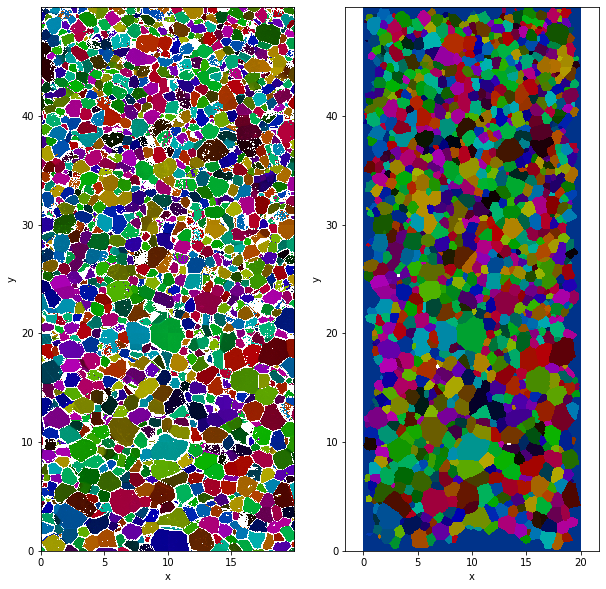

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(121)
data.f_map.plot.imshow()
plt.subplot(122)
data.f_map_mg.plot.imshow()
plt.axis('equal')